In [42]:
import numpy as np
import pandas as pd
import pickle
from sklearn import datasets # sklearn comes with some toy datasets to practise
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot
from sklearn.metrics import silhouette_score
import ast

# step 0: load the data

In [21]:
df = pd.read_csv("track_features_lst_backup.csv")

In [31]:
df2 = pd.DataFrame(columns=["danceability","energy","loudness","speechiness","acousticness", "instrumentalness","liveness","valence","tempo","id","duration_ms"])
df2.update(df.loc[0][0])
df2

ValueError: DataFrame constructor not properly called!

In [54]:
# make each row with str elements into dicts and assign them to the corresponding features
df2 = pd.DataFrame(columns=["danceability","energy","loudness","speechiness","acousticness", "instrumentalness","liveness","valence","tempo","id","duration_ms"])
for i in range(len(df)):
    df2.loc[i] = ast.literal_eval(df.loc[i][0])

In [59]:
X = pd.DataFrame(df2)

# step 1: clean the data

In [67]:
X.index=X["id"]

ValueError: No axis named 1 for object type Series

In [72]:
X = X.drop("id",axis=1)

In [69]:
X.describe()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4.424000e+03
mean,0.634168,0.606388,-7.911866,0.085716,0.313141,0.094771,0.171083,0.481641,122.281409,2.022240e+05
std,0.160914,0.223908,4.438364,0.083292,0.315155,0.247313,0.125829,0.240089,27.188369,7.280388e+04
min,0.061000,0.000206,-40.474000,0.023300,0.000008,0.000000,0.010400,0.017500,47.971000,5.902700e+04
25%,0.551000,0.467000,-9.250250,0.038000,0.043725,0.000000,0.095575,0.293000,101.988000,1.623782e+05
50%,0.656000,0.638000,-6.786000,0.051800,0.182000,0.000015,0.121000,0.478500,123.468500,1.907655e+05
75%,0.745000,0.785000,-5.135000,0.093425,0.551000,0.003432,0.201250,0.668250,139.740000,2.244370e+05
max,0.978000,0.999000,-0.155000,0.797000,0.996000,0.991000,0.976000,0.981000,210.857000,1.496133e+06


# step 2: scale the data

In [120]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns, index=X.index)
display(X.head())
print()
display(X_scaled_df.head())

# save scaler in pickle file
with open("Model/scaler.pkl", "wb") as f:
    pickle.dump(scaler,f)

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
id,,,,,,,,,,
7DyDjhZMEIK5Ied4juTCyc,0.792,0.679,-5.516,0.0410,0.5170,0.000015,0.0962,0.204,119.932,151320
7jYwZOptDPesQgzj7vhsEF,0.662,0.726,-6.786,0.0516,0.1320,0.000000,0.4550,0.408,149.944,148800
11eYmv0tA3wEoyD1Sad2Nv,0.888,0.607,-5.632,0.1650,0.1470,0.000000,0.1110,0.728,103.136,134888
54eE5H6F1HhyM5L4fRLq8s,0.613,0.935,-2.653,0.0404,0.0255,0.000000,0.1840,0.859,77.498,170371
0yLdNVWF3Srea0uzk55zFn,0.707,0.681,-4.325,0.0668,0.0632,0.000005,0.0322,0.646,117.999,200455


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
id,,,,,,,,,,
7DyDjhZMEIK5Ied4juTCyc,0.980957,0.324332,0.539869,-0.536925,0.646928,-0.383184,-0.595183,-1.156541,-0.086422,-0.699273
7jYwZOptDPesQgzj7vhsEF,0.172983,0.534264,0.253696,-0.409647,-0.574832,-0.383244,2.256630,-0.306760,1.017557,-0.733891
11eYmv0tA3wEoyD1Sad2Nv,1.577615,0.002735,0.513731,0.951988,-0.527231,-0.383244,-0.477550,1.026230,-0.704256,-0.925001
54eE5H6F1HhyM5L4fRLq8s,-0.131561,1.467788,1.185000,-0.544129,-0.912800,-0.383244,0.102668,1.571923,-1.647339,-0.437568
0yLdNVWF3Srea0uzk55zFn,0.452667,0.333266,0.808242,-0.227135,-0.793163,-0.383224,-1.103868,0.684651,-0.157527,-0.024302


In [75]:
X_scaled_df.describe()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,4.424000e+03,4.424000e+03,4.424000e+03,4.424000e+03,4.424000e+03,4.424000e+03,4.424000e+03,4.424000e+03,4.424000e+03,4.424000e+03
mean,2.980738e-15,-2.477800e-16,3.238145e-16,2.431311e-16,1.543873e-16,9.262231e-16,-1.945400e-16,-1.891947e-16,-4.440390e-16,-2.980336e-16
std,1.000113e+00,1.000113e+00,1.000113e+00,1.000113e+00,1.000113e+00,1.000113e+00,1.000113e+00,1.000113e+00,1.000113e+00,1.000113e+00
min,-3.562342e+00,-2.707585e+00,-7.337347e+00,-7.494554e-01,-9.936978e-01,-3.832443e-01,-1.277139e+00,-1.933425e+00,-2.733478e+00,-1.967110e+00
25%,-5.169020e-01,-6.225920e-01,-3.015830e-01,-5.729471e-01,-8.549646e-01,-3.832443e-01,-6.001509e-01,-7.858035e-01,-7.464848e-01,-5.473651e-01
50%,1.356922e-01,1.412007e-01,2.536956e-01,-4.072454e-01,-4.161623e-01,-3.831841e-01,-3.980680e-01,-1.308584e-02,4.366664e-02,-1.574071e-01
75%,6.888435e-01,7.977944e-01,6.257216e-01,9.256122e-02,7.548235e-01,-3.693636e-01,2.397749e-01,7.773356e-01,6.422071e-01,3.051412e-01
max,2.136981e+00,1.753652e+00,1.747884e+00,8.540644e+00,2.166988e+00,3.624276e+00,6.397641e+00,2.080125e+00,3.258217e+00,1.777454e+01


# step 3: cluster the data

## assign k=8 as default

In [79]:
kmeans = KMeans(n_clusters=8, random_state=1234)
kmeans.fit(X_scaled_df)

KMeans(random_state=1234)

In [91]:
kmeans.labels_

array([15,  7,  9, ..., 11,  8,  8])

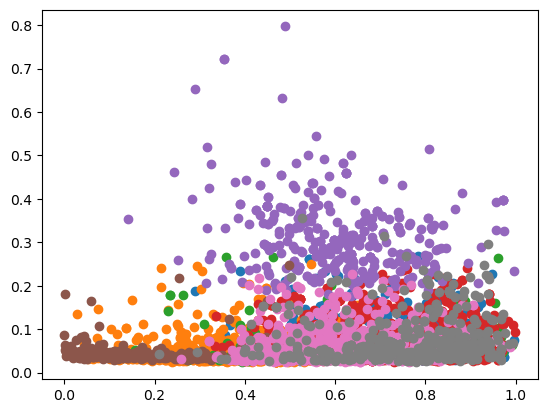

In [82]:
# assign a cluster to each example
labels = kmeans.predict(X_scaled_df)
# retrieve unique clusters
clusters = np.unique(labels)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(labels == cluster)
    # create scatter of these samples
    pyplot.scatter(X.to_numpy()[row_ix, 1], X.to_numpy()[row_ix, 3])
    # show the plot
pyplot.show()

In [84]:
kmeans8 = KMeans(n_clusters=8,
                init="k-means++",
                n_init=50,  # try with 1, 4, 8, 20, 30, 100...
                max_iter=1,
                tol=0,
                algorithm="elkan",
                random_state=1234)
kmeans8.fit(X_scaled_df)
print(kmeans8.inertia_)

20874.207693646178


## now find the optimal k

## try elbow

Training a K-Means model with 2 clusters! 

Training a K-Means model with 3 clusters! 

Training a K-Means model with 4 clusters! 

Training a K-Means model with 5 clusters! 

Training a K-Means model with 6 clusters! 

Training a K-Means model with 7 clusters! 

Training a K-Means model with 8 clusters! 

Training a K-Means model with 9 clusters! 

Training a K-Means model with 10 clusters! 

Training a K-Means model with 11 clusters! 

Training a K-Means model with 12 clusters! 

Training a K-Means model with 13 clusters! 

Training a K-Means model with 14 clusters! 

Training a K-Means model with 15 clusters! 

Training a K-Means model with 16 clusters! 

Training a K-Means model with 17 clusters! 

Training a K-Means model with 18 clusters! 

Training a K-Means model with 19 clusters! 

Training a K-Means model with 20 clusters! 



Text(0.5, 1.0, 'Elbow Method showing the optimal k')

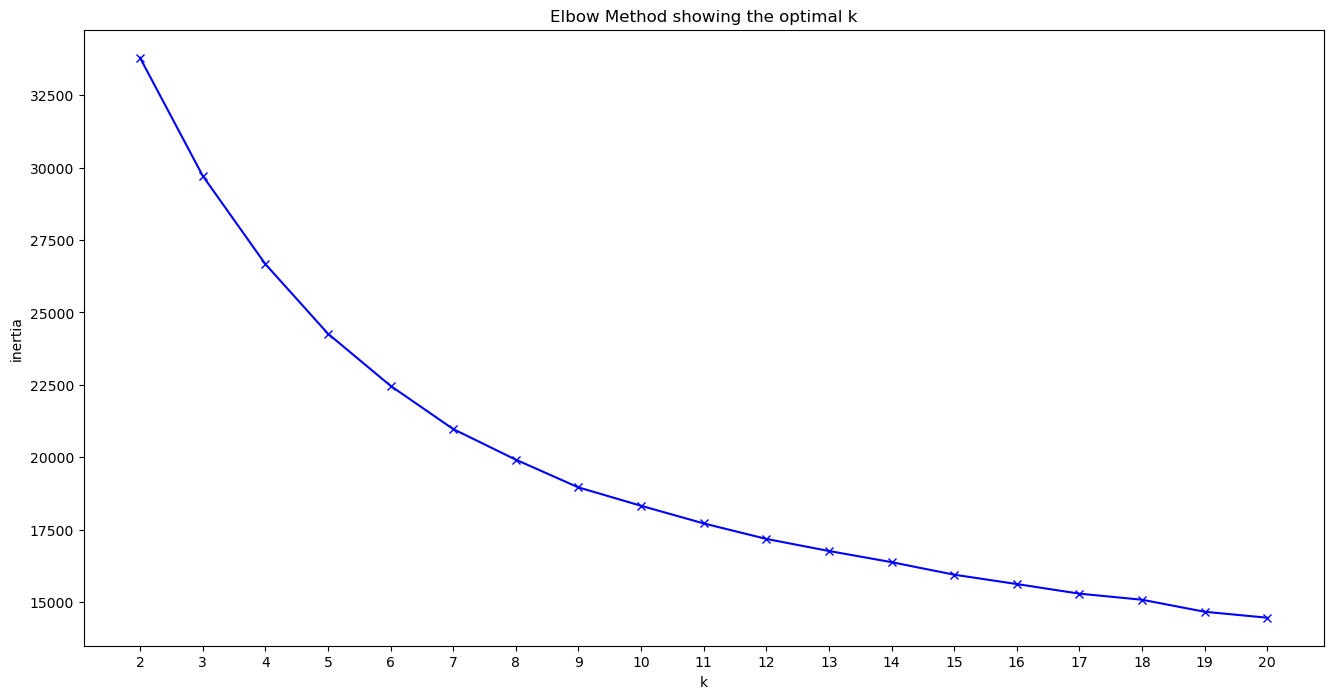

In [85]:
K = range(2, 21)
inertia = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_scaled_df)
    inertia.append(kmeans.inertia_)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

## try silhouette

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

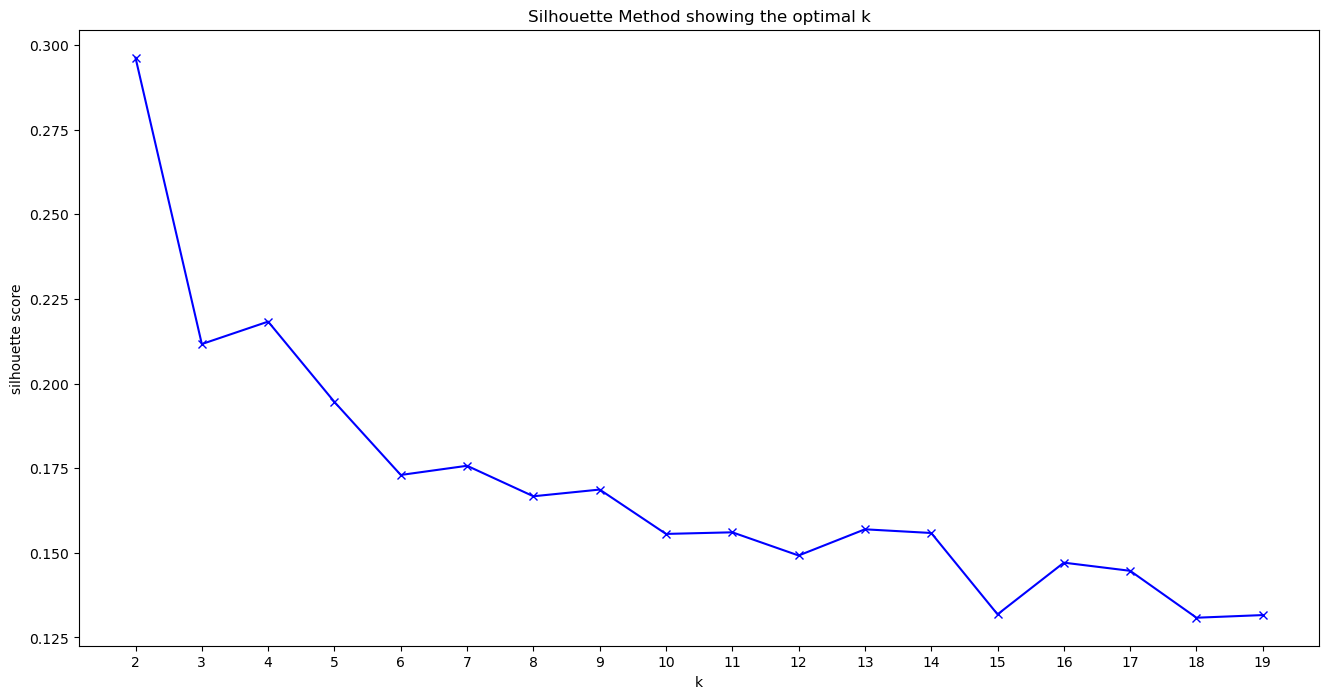

In [87]:
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_scaled_df)

    filename = "Model/kmeans_" + str(k) + ".pickle"
    with open(filename, "wb") as f:
        pickle.dump(kmeans,f)

    silhouette.append(silhouette_score(X_scaled_df, kmeans.predict(X_scaled_df)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

In [118]:
len(X_scaled_df.columns)

11

# step 4: apply optimal model

In [111]:
kmeans4 = KMeans(n_clusters=4,
                init="k-means++",
                n_init=50,  # try with 1, 4, 8, 20, 30, 100...
                max_iter=1,
                tol=0,
                algorithm="elkan",
                random_state=1234)
kmeans4.fit(X_scaled_df)
print(kmeans4.inertia_)

26954.742497020947


In [121]:
with open("Model/kmeans_4.pkl", "wb") as f:
    pickle.dump(kmeans4,f)

In [113]:
X_scaled_df["cluster"] = kmeans4.labels_

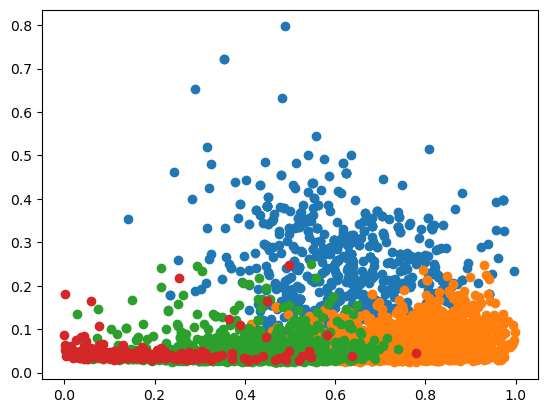

In [112]:
# assign a cluster to each example
labels = kmeans4.predict(X_scaled_df)
# retrieve unique clusters
clusters = np.unique(labels)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(labels == cluster)
    # create scatter of these samples
    pyplot.scatter(X.to_numpy()[row_ix, 1], X.to_numpy()[row_ix, 3])
    # show the plot
pyplot.show()

## assign labels

In [114]:
X_scaled_df

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,cluster
id,,,,,,,,,,,
7DyDjhZMEIK5Ied4juTCyc,0.980957,0.324332,0.539869,-0.536925,0.646928,-0.383184,-0.595183,-1.156541,-0.086422,-0.699273,2
7jYwZOptDPesQgzj7vhsEF,0.172983,0.534264,0.253696,-0.409647,-0.574832,-0.383244,2.256630,-0.306760,1.017557,-0.733891,1
11eYmv0tA3wEoyD1Sad2Nv,1.577615,0.002735,0.513731,0.951988,-0.527231,-0.383244,-0.477550,1.026230,-0.704256,-0.925001,0
54eE5H6F1HhyM5L4fRLq8s,-0.131561,1.467788,1.185000,-0.544129,-0.912800,-0.383244,0.102668,1.571923,-1.647339,-0.437568,1
0yLdNVWF3Srea0uzk55zFn,0.452667,0.333266,0.808242,-0.227135,-0.793163,-0.383224,-1.103868,0.684651,-0.157527,-0.024302,1
...,...,...,...,...,...,...,...,...,...,...,...
1MQHacUW73AKPG9nlf28oZ,-0.591484,-2.078711,-1.046480,3.209373,1.329210,2.443453,-0.223208,-0.502543,1.411704,-0.964674,0
43rQHWHRNUYvjp1kauDnjL,0.825577,-0.059797,-0.593109,0.555745,-0.495497,-0.221488,-0.517291,0.401391,-1.628616,-1.277453,0
1dGC8B4AVlFvTE7hW1ZNK3,0.471312,-0.618125,-0.109092,-0.550133,0.548552,2.111852,-0.318586,-0.590021,-1.739485,-0.841040,2


In [115]:
df_clustered = X_scaled_df["cluster"]

# step 5: save to .csv

In [116]:
df_clustered.to_csv("df_clustered.csv", index_label=False)